import requests

# Пример запроса к TCIA API



**Шаг 1**. The Cancer Imaging Archive (TCIA) предоставляет доступ к медицинским изображениям через API. Вы можете использовать библиотеку requests для загрузки данных из TCIA:

In [1]:
import requests

# Пример запроса к TCIA API
url = "https://services.cancerimagingarchive.net/services/v3/TCIA/query/getSeries?Collection=TCGA-BRCA"
response = requests.get(url)

# Проверка ответа
if response.status_code == 200:
    print("Данные получены успешно")
else:
    print("Ошибка получения данных")



Данные получены успешно


**Шаг 2.** Данные приходят в JSON формате.
В этом примере запрос отправляется с параметром format=json, чтобы вернуть данные в формате JSON.
Преобразование ответа в JSON:
response.json() позволяет конвертировать ответ в словарь Python, с которым будем работать дальше.
Обработка JSON-ответа:
Сначала печатаем весь JSON для ознакомления.

In [2]:
import requests
import json

# Пример запроса к TCIA API, предполагающий JSON формат
url = "https://services.cancerimagingarchive.net/services/v3/TCIA/query/getSeries?Collection=TCGA-BRCA&format=json"
response = requests.get(url)

# Проверка ответа
if response.status_code == 200:
    print("Данные получены успешно")

    # Преобразование ответа в JSON
    data = response.json()
    print(json.dumps(data, indent=4))  # Печать данных в формате JSON с отступами

    # Обработка данных
    for item in data:
        series_instance_uid = item.get('SeriesInstanceUID', 'N/A')
        modality = item.get('Modality', 'N/A')
        protocol_name = item.get('ProtocolName', 'N/A')
        body_part_examined = item.get('BodyPartExamined', 'N/A')

        # Печать извлеченной информации
        print(f"SeriesInstanceUID: {series_instance_uid}")
        print(f"Modality: {modality}")
        print(f"ProtocolName: {protocol_name}")
        print(f"BodyPartExamined: {body_part_examined}")
        print('-' * 30)
else:
    print("Ошибка получения данных")


Выходные данные были обрезаны до нескольких последних строк (5000).
SeriesInstanceUID: 1.3.6.1.4.1.14519.5.2.1.6450.4002.240831734808981235886758156447
Modality: MR
ProtocolName: N/A
BodyPartExamined: BREAST
------------------------------
SeriesInstanceUID: 1.3.6.1.4.1.14519.5.2.1.6450.4002.339963655672432655223423353554
Modality: MR
ProtocolName: N/A
BodyPartExamined: BREAST
------------------------------
SeriesInstanceUID: 1.3.6.1.4.1.14519.5.2.1.6450.4002.325607836963460379034020654281
Modality: MR
ProtocolName: N/A
BodyPartExamined: BREAST
------------------------------
SeriesInstanceUID: 1.3.6.1.4.1.14519.5.2.1.6450.4002.282877615330280376078734696973
Modality: MR
ProtocolName: N/A
BodyPartExamined: BREAST
------------------------------
SeriesInstanceUID: 1.3.6.1.4.1.14519.5.2.1.6450.4002.199532769200268583433474778786
Modality: MR
ProtocolName: N/A
BodyPartExamined: BREAST
------------------------------
SeriesInstanceUID: 1.3.6.1.4.1.14519.5.2.1.6450.4002.108665300491756890793844

**Шаг3**.**Получение идентификаторов для загрузки изображений**

Используя первый запрос к TCIA API, получили метаданные, такие как SeriesInstanceUID для каждой серии изображений.
Эти идентификаторы нужны для следующего шага — получения ссылок на сами изображения.
Запрос на загрузку изображений с использованием SeriesInstanceUID
Чтобы загрузить все изображения в определенной серии, нужно выполнить запрос к TCIA API с использованием SeriesInstanceUID

In [3]:
import os
import requests

# Пример использования SeriesInstanceUID
series_instance_uid = "1.3.6.1.4.1.14519.5.2.1.6450.4002.265963154110062013582166845425"  # Пример идентификатора

# URL для загрузки изображений
url = f"https://services.cancerimagingarchive.net/services/v3/TCIA/query/getImage?SeriesInstanceUID={series_instance_uid}"
response = requests.get(url, stream=True)

# Путь для сохранения ZIP-файла
output_path = "/content/images.zip"

# Создание необходимых папок, если их нет
folder_path = os.path.dirname(output_path)
os.makedirs(folder_path, exist_ok=True)

# Проверка ответа и сохранение изображения
if response.status_code == 200:
    print(f"Сохранение файла в {output_path}")
    with open(output_path, "wb") as file:
        for chunk in response.iter_content(chunk_size=128):
            file.write(chunk)
    print(f"Изображения успешно загружены и сохранены как {output_path}")
else:
    print("Ошибка при загрузке изображений")


Сохранение файла в /content/images.zip
Изображения успешно загружены и сохранены как /content/images.zip


In [4]:
import zipfile

# Распаковка загруженного ZIP-файла
with zipfile.ZipFile("images.zip", 'r') as zip_ref:
    zip_ref.extractall("images")  # Папка для распакованных изображений
print("Файлы успешно распакованы")


Файлы успешно распакованы


**Шаг. 4**# Для чтения DICOM файлов используйте pydicom, а для визуализации изображений — matplotlib.

In [5]:
!pip install pydicom


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 20.6 MB/s eta 0:00:00


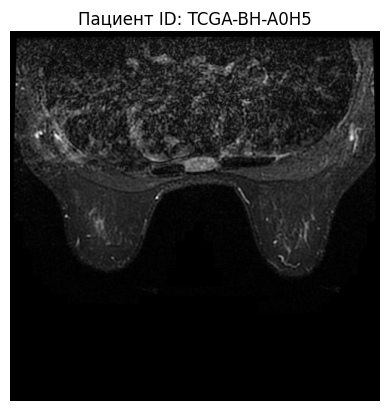

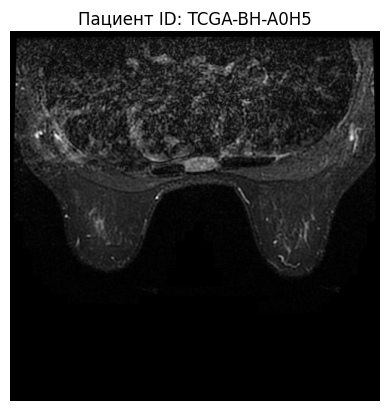

In [ ]:
import os
import pydicom
import matplotlib.pyplot as plt

# Папка с распакованными изображениями
dicom_folder = "images"

# Чтение всех DICOM-файлов в папке и визуализация первого изображения
for filename in os.listdir(dicom_folder):
    if filename.endswith(".dcm"):
        dicom_path = os.path.join(dicom_folder, filename)
        dicom_data = pydicom.dcmread(dicom_path)

        # Получение массива пикселей изображения
        image = dicom_data.pixel_array

        # Визуализация изображения
        plt.imshow(image, cmap="gray")
        plt.title(f"Пациент ID: {dicom_data.PatientID}")
        plt.axis("off")
        plt.show()
        break  # Визуализируем только первое изображение


 библиотеки, как OpenCV, scikit-image, и NumPy предоставляют множество инструментов для фильтрации, повышения контраста и удаления шума.

**Фильтрация для уменьшения шума**
Использование фильтра Гаусса для сглаживания изображения и уменьшения шума

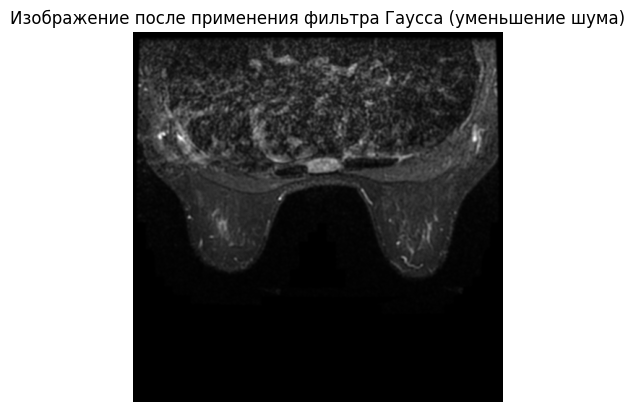

In [ ]:
import cv2
import numpy as np

# Применение фильтра Гаусса для уменьшения шума
denoised_image = cv2.GaussianBlur(image, (5, 5), 0)

# Визуализация результата
plt.imshow(denoised_image, cmap="gray")
plt.title("Изображение после применения фильтра Гаусса (уменьшение шума)")
plt.axis("off")
plt.show()


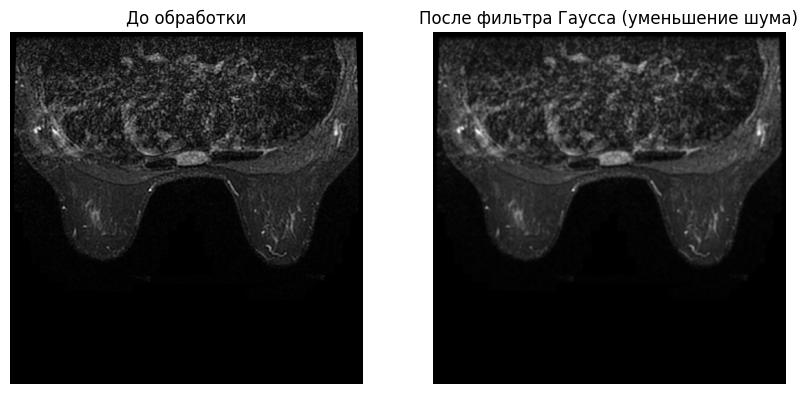

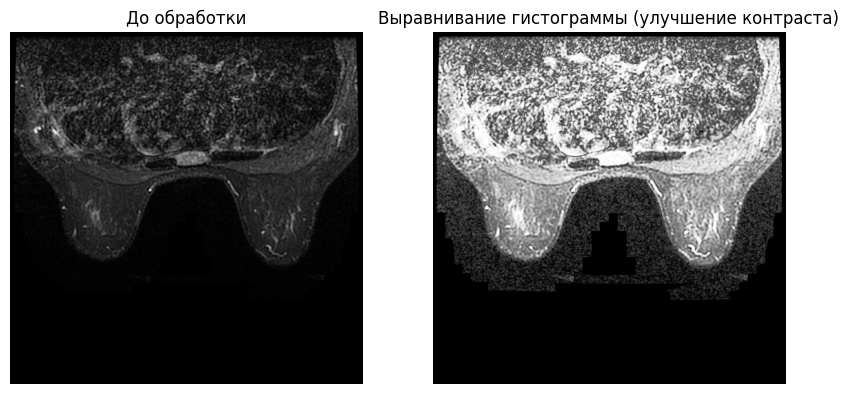

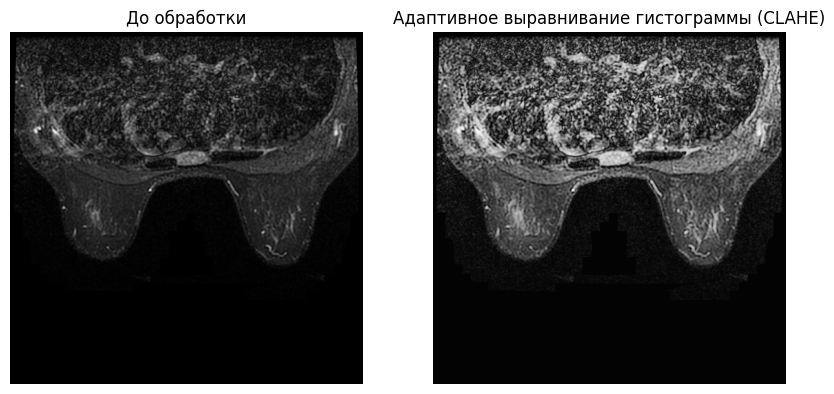

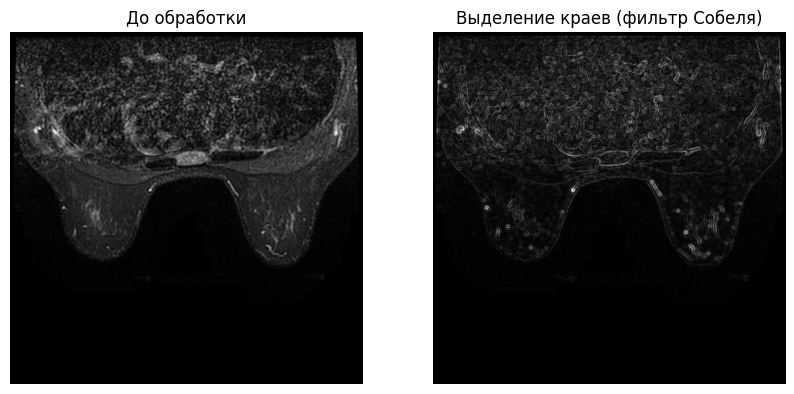

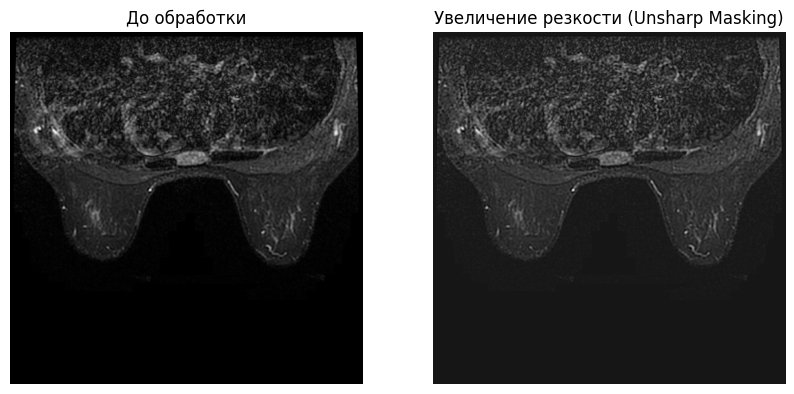

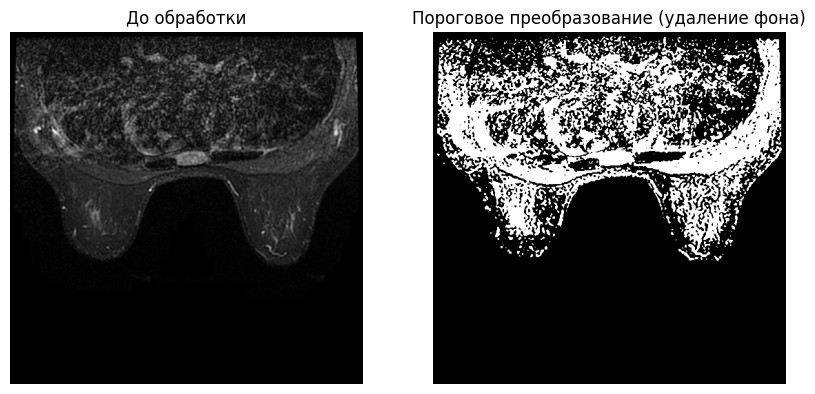

In [ ]:
import os
import cv2
import numpy as np
import pydicom
import matplotlib.pyplot as plt
from skimage import exposure

# Папка с распакованными изображениями
dicom_folder = "images"

# Чтение первого DICOM-файла в папке
dicom_path = os.path.join(dicom_folder, os.listdir(dicom_folder)[0])
dicom_data = pydicom.dcmread(dicom_path)

# Получение массива пикселей изображения
image = dicom_data.pixel_array

# Функция для отображения сравнения изображений "До" и "После"
def show_comparison(original, processed, title):
    plt.figure(figsize=(10, 5))
    # Оригинальное изображение
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title('До обработки')
    plt.axis('off')
    # Обработанное изображение
    plt.subplot(1, 2, 2)
    plt.imshow(processed, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# 1. Применение фильтра Гаусса для уменьшения шума
denoised_image = cv2.GaussianBlur(image, (5, 5), 0)
show_comparison(image, denoised_image, 'После фильтра Гаусса (уменьшение шума)')

# 2. Выравнивание гистограммы для улучшения контраста
equalized_image = exposure.equalize_hist(image)
show_comparison(image, equalized_image, 'Выравнивание гистограммы (улучшение контраста)')

# 3. Адаптивное выравнивание гистограммы (CLAHE)
# Преобразование типа данных изображения к uint8
image_uint8 = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Применение CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(image_uint8)
show_comparison(image, clahe_image, 'Адаптивное выравнивание гистограммы (CLAHE)')

# 4. Выделение краев с использованием фильтра Собеля
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_image = np.hypot(sobelx, sobely)
show_comparison(image, sobel_image, 'Выделение краев (фильтр Собеля)')

# 5. Увеличение резкости изображения (Unsharp Masking)
blurred_image = cv2.GaussianBlur(image, (9, 9), 10.0)
sharpened_image = cv2.addWeighted(image, 1.5, blurred_image, -0.5, 0)
show_comparison(image, sharpened_image, 'Увеличение резкости (Unsharp Masking)')

# 6. Пороговое преобразование для удаления фона
_, threshold_image = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)
show_comparison(image, threshold_image, 'Пороговое преобразование (удаление фона)')


In [6]:
!pip install scikit-image

In [7]:
!pip install SimpleITK


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 MB 10.6 MB/s eta 0:00:00


In [8]:
!pip install bm3d


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 862.0/862.0 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 47.5 MB/s eta 0:00:00


Частотные фильтры

<ipython-input-7-0bd00bf3b598>:116: RuntimeWarning: divide by zero encountered in scalar divide
  mask[i, j] = 1 / (1 + (D0 / D) ** (2 * n))


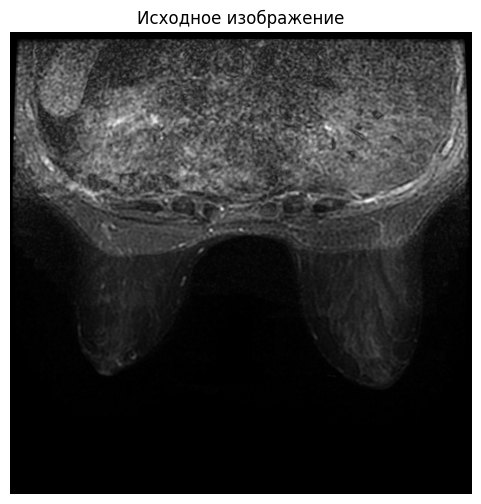

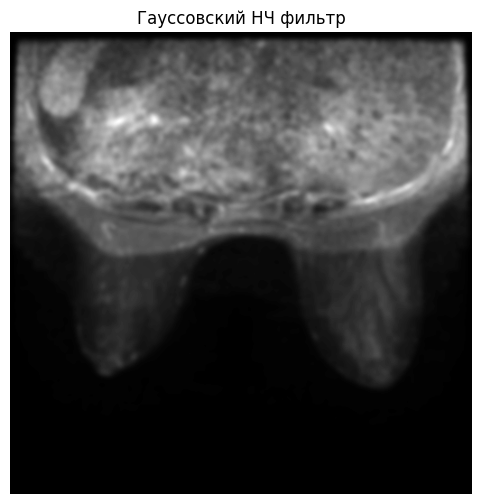

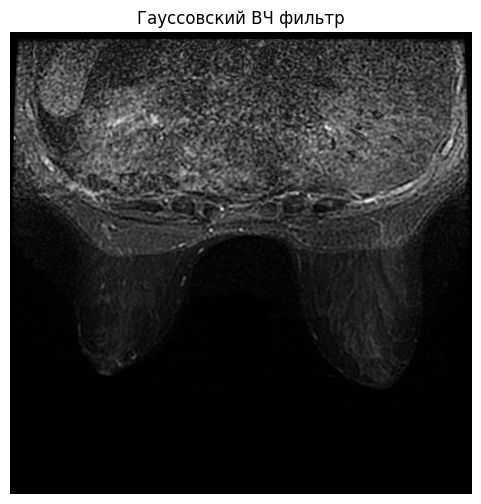

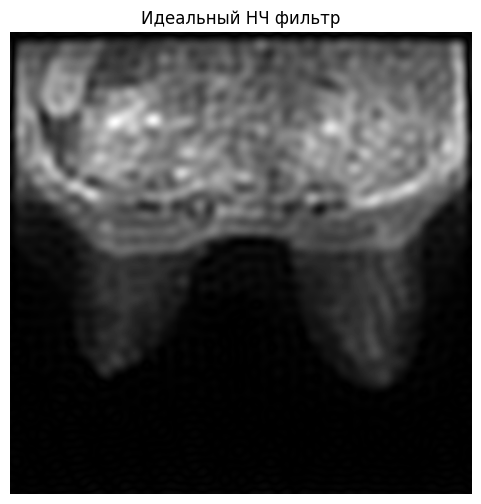

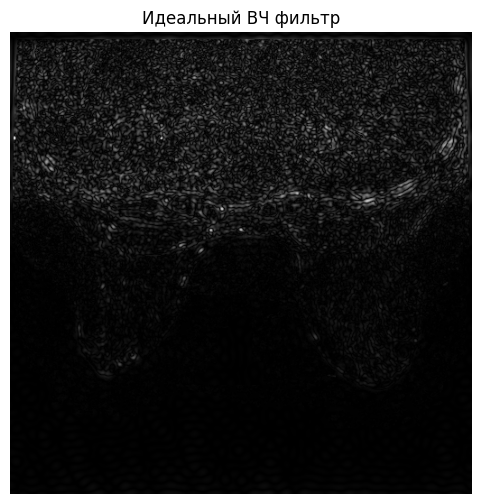

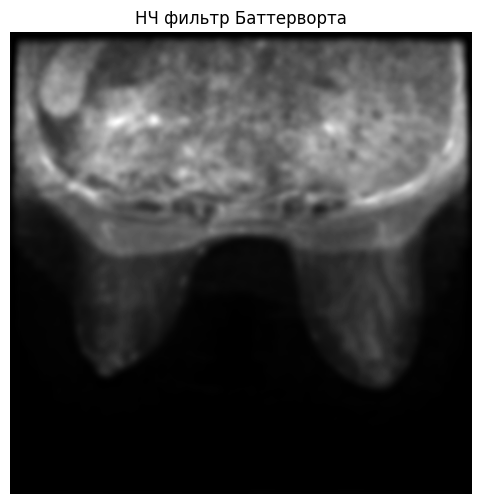

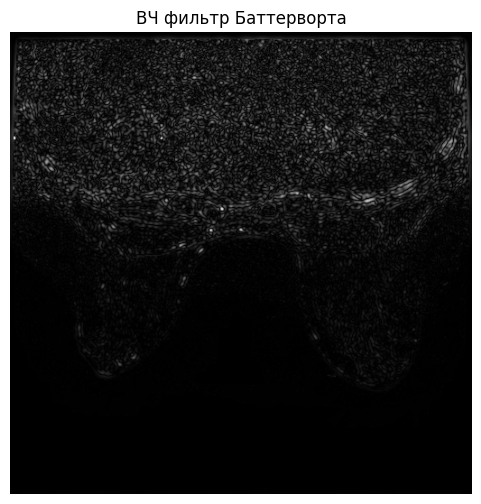

In [ ]:
import os
import cv2
import numpy as np
import pydicom
import matplotlib.pyplot as plt
from skimage import exposure

# Папка с распакованными изображениями
dicom_folder = "images"

# Чтение всех DICOM-файлов в папке и наложение изображений
dicom_files = [os.path.join(dicom_folder, f) for f in os.listdir(dicom_folder) if f.endswith('.dcm')]
combined_image = None

for dicom_path in dicom_files:
    dicom_data = pydicom.dcmread(dicom_path)
    image = dicom_data.pixel_array

    # Преобразование изображения в формат uint8
    image_uint8 = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    if combined_image is None:
        combined_image = image_uint8
    else:
        combined_image = cv2.addWeighted(combined_image, 0.5, image_uint8, 0.5, 0)

# Функция для отображения изображения
def show_image(image, title):
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Гауссовский НЧ фильтр (Low Pass Filter)
gaussian_low_pass = cv2.GaussianBlur(combined_image, (15, 15), 0)

# Гауссовский ВЧ фильтр (High Pass Filter)
gaussian_blurred = cv2.GaussianBlur(combined_image, (15, 15), 0)
gaussian_high_pass = cv2.addWeighted(combined_image, 1.5, gaussian_blurred, -0.5, 0)

# Идеальный НЧ фильтр в частотной области
def ideal_low_pass_filter(image, D0):
    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    rows, cols = image.shape
    crow, ccol = rows // 2 , cols // 2
    mask = np.zeros((rows, cols, 2), np.uint8)
    for i in range(rows):
        for j in range(cols):
            if np.sqrt((i - crow) ** 2 + (j - ccol) ** 2) <= D0:
                mask[i, j] = 1

    fshift = dft_shift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
    return np.uint8(cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX))

ideal_low_pass = ideal_low_pass_filter(combined_image, 30)

# Идеальный ВЧ фильтр в частотной области
def ideal_high_pass_filter(image, D0):
    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    rows, cols = image.shape
    crow, ccol = rows // 2 , cols // 2
    mask = np.ones((rows, cols, 2), np.uint8)
    for i in range(rows):
        for j in range(cols):
            if np.sqrt((i - crow) ** 2 + (j - ccol) ** 2) <= D0:
                mask[i, j] = 0

    fshift = dft_shift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
    return np.uint8(cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX))

ideal_high_pass = ideal_high_pass_filter(combined_image, 30)

# НЧ фильтр Баттерворта
def butterworth_low_pass_filter(image, D0, n):
    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    rows, cols = image.shape
    crow, ccol = rows // 2 , cols // 2
    mask = np.zeros((rows, cols, 2), np.float32)
    for i in range(rows):
        for j in range(cols):
            D = np.sqrt((i - crow) ** 2 + (j - ccol) ** 2)
            mask[i, j] = 1 / (1 + (D / D0) ** (2 * n))

    fshift = dft_shift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
    return np.uint8(cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX))

butterworth_low_pass = butterworth_low_pass_filter(combined_image, 30, 2)

# ВЧ фильтр Баттерворта
def butterworth_high_pass_filter(image, D0, n):
    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    rows, cols = image.shape
    crow, ccol = rows // 2 , cols // 2
    mask = np.ones((rows, cols, 2), np.float32)
    for i in range(rows):
        for j in range(cols):
            D = np.sqrt((i - crow) ** 2 + (j - ccol) ** 2)
            mask[i, j] = 1 / (1 + (D0 / D) ** (2 * n))

    fshift = dft_shift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
    return np.uint8(cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX))

butterworth_high_pass = butterworth_high_pass_filter(combined_image, 30, 2)

# Отображение всех изображений
show_image(combined_image, 'Исходное изображение')
show_image(gaussian_low_pass, 'Гауссовский НЧ фильтр')
show_image(gaussian_high_pass, 'Гауссовский ВЧ фильтр')
show_image(ideal_low_pass, 'Идеальный НЧ фильтр')
show_image(ideal_high_pass, 'Идеальный ВЧ фильтр')
show_image(butterworth_low_pass, 'НЧ фильтр Баттерворта')
show_image(butterworth_high_pass, 'ВЧ фильтр Баттерворта')


<ipython-input-12-23ceeba02b7d>:116: RuntimeWarning: divide by zero encountered in scalar divide
  mask[i, j] = 1 / (1 + (D0 / D) ** (2 * n))


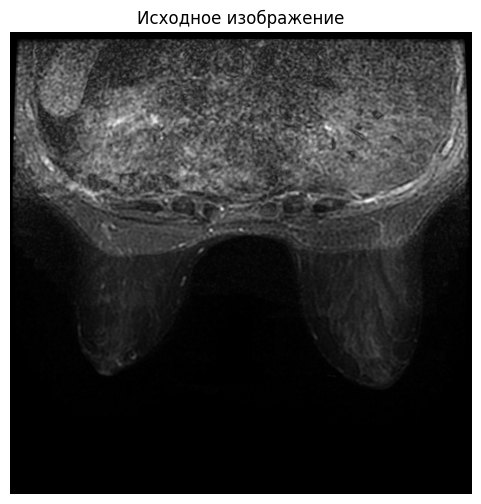

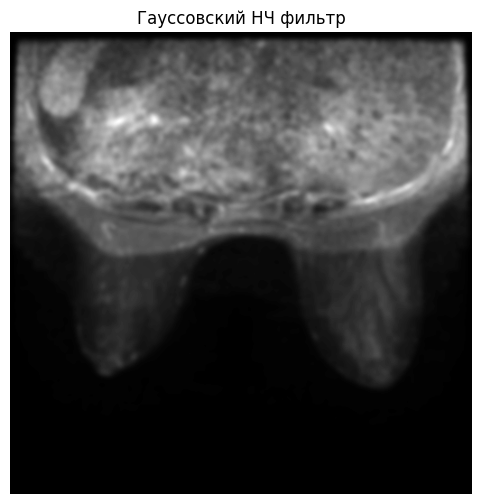

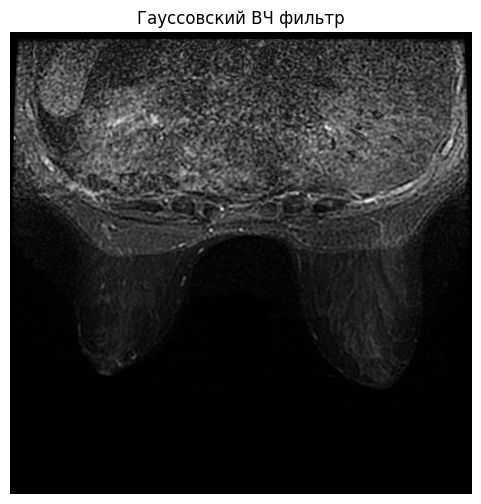

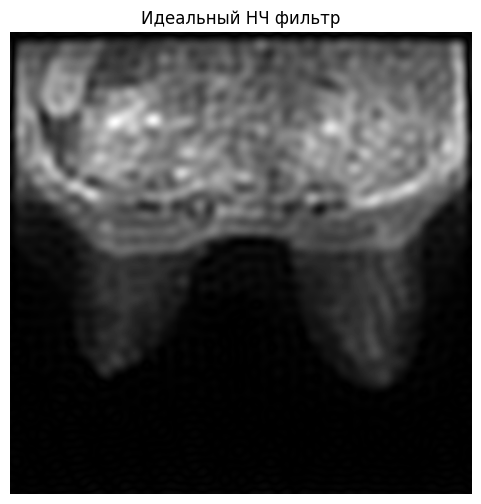

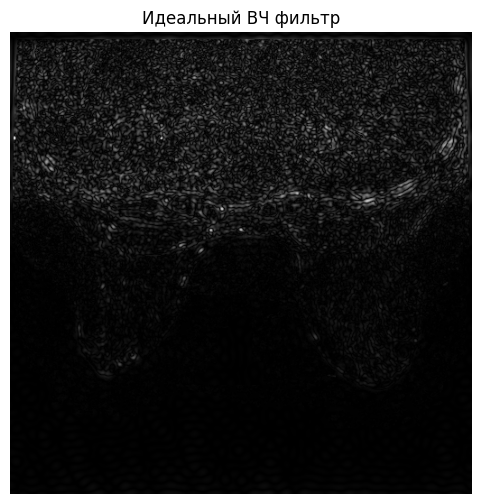

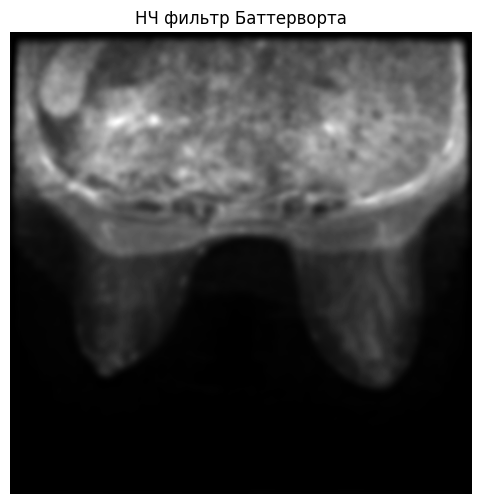

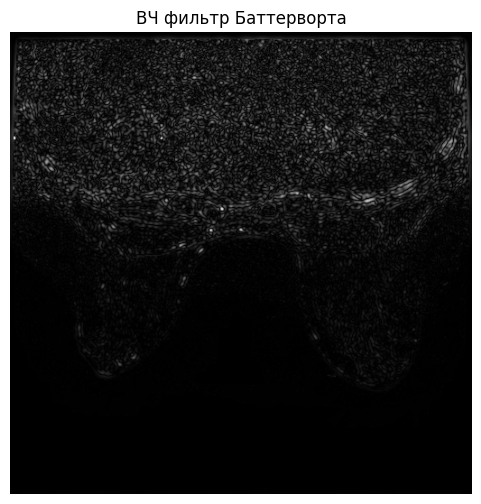

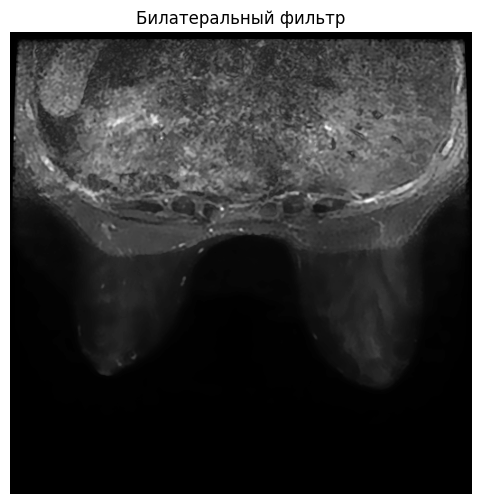

In [ ]:
import os
import cv2
import numpy as np
import pydicom
import matplotlib.pyplot as plt
from skimage import exposure

# Папка с распакованными изображениями
dicom_folder = "images"

# Чтение всех DICOM-файлов в папке и наложение изображений
dicom_files = [os.path.join(dicom_folder, f) for f in os.listdir(dicom_folder) if f.endswith('.dcm')]
combined_image = None

for dicom_path in dicom_files:
    dicom_data = pydicom.dcmread(dicom_path)
    image = dicom_data.pixel_array

    # Преобразование изображения в формат uint8
    image_uint8 = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    if combined_image is None:
        combined_image = image_uint8
    else:
        combined_image = cv2.addWeighted(combined_image, 0.5, image_uint8, 0.5, 0)

# Функция для отображения изображения
def show_image(image, title):
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Гауссовский НЧ фильтр (Low Pass Filter)
gaussian_low_pass = cv2.GaussianBlur(combined_image, (15, 15), 0)

# Гауссовский ВЧ фильтр (High Pass Filter)
gaussian_blurred = cv2.GaussianBlur(combined_image, (15, 15), 0)
gaussian_high_pass = cv2.addWeighted(combined_image, 1.5, gaussian_blurred, -0.5, 0)

# Идеальный НЧ фильтр в частотной области
def ideal_low_pass_filter(image, D0):
    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    rows, cols = image.shape
    crow, ccol = rows // 2 , cols // 2
    mask = np.zeros((rows, cols, 2), np.uint8)
    for i in range(rows):
        for j in range(cols):
            if np.sqrt((i - crow) ** 2 + (j - ccol) ** 2) <= D0:
                mask[i, j] = 1

    fshift = dft_shift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
    return np.uint8(cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX))

ideal_low_pass = ideal_low_pass_filter(combined_image, 30)

# Идеальный ВЧ фильтр в частотной области
def ideal_high_pass_filter(image, D0):
    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    rows, cols = image.shape
    crow, ccol = rows // 2 , cols // 2
    mask = np.ones((rows, cols, 2), np.uint8)
    for i in range(rows):
        for j in range(cols):
            if np.sqrt((i - crow) ** 2 + (j - ccol) ** 2) <= D0:
                mask[i, j] = 0

    fshift = dft_shift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
    return np.uint8(cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX))

ideal_high_pass = ideal_high_pass_filter(combined_image, 30)

# НЧ фильтр Баттерворта
def butterworth_low_pass_filter(image, D0, n):
    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    rows, cols = image.shape
    crow, ccol = rows // 2 , cols // 2
    mask = np.zeros((rows, cols, 2), np.float32)
    for i in range(rows):
        for j in range(cols):
            D = np.sqrt((i - crow) ** 2 + (j - ccol) ** 2)
            mask[i, j] = 1 / (1 + (D / D0) ** (2 * n))

    fshift = dft_shift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
    return np.uint8(cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX))

butterworth_low_pass = butterworth_low_pass_filter(combined_image, 30, 2)

# ВЧ фильтр Баттерворта
def butterworth_high_pass_filter(image, D0, n):
    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    rows, cols = image.shape
    crow, ccol = rows // 2 , cols // 2
    mask = np.ones((rows, cols, 2), np.float32)
    for i in range(rows):
        for j in range(cols):
            D = np.sqrt((i - crow) ** 2 + (j - ccol) ** 2)
            mask[i, j] = 1 / (1 + (D0 / D) ** (2 * n))

    fshift = dft_shift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
    return np.uint8(cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX))

butterworth_high_pass = butterworth_high_pass_filter(combined_image, 30, 2)

# Билатеральный фильтр (Bilateral Filter)
bilateral_filtered = cv2.bilateralFilter(combined_image, d=15, sigmaColor=7, sigmaSpace=7)

# Отображение всех изображений
show_image(combined_image, 'Исходное изображение')
show_image(gaussian_low_pass, 'Гауссовский НЧ фильтр')
show_image(gaussian_high_pass, 'Гауссовский ВЧ фильтр')
show_image(ideal_low_pass, 'Идеальный НЧ фильтр')
show_image(ideal_high_pass, 'Идеальный ВЧ фильтр')
show_image(butterworth_low_pass, 'НЧ фильтр Баттерворта')
show_image(butterworth_high_pass, 'ВЧ фильтр Баттерворта')
show_image(bilateral_filtered, 'Билатеральный фильтр')


С использованием изображения с компьютера

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure

# Загрузка изображения с компьютера
image_path = "/content/3.jpg"  # Укажите путь к вашему изображению
combined_image = cv2.imread(image_path)  # Загрузка цветного изображения

# Проверка успешной загрузки изображения
if combined_image is None:
    raise FileNotFoundError(f"Не удалось загрузить изображение по указанному пути: {image_path}")

# Функция для отображения изображения
def show_image(image, title):
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Вывод загруженного изображения
show_image(combined_image, 'Загруженное цветное изображение')

# Гауссовский НЧ фильтр (Low Pass Filter)
gaussian_low_pass = cv2.GaussianBlur(combined_image, (15, 15), 0)

# Гауссовский ВЧ фильтр (High Pass Filter)
gaussian_blurred = cv2.GaussianBlur(combined_image, (15, 15), 0)
gaussian_high_pass = cv2.addWeighted(combined_image, 1.5, gaussian_blurred, -0.5, 0)

# Применение DFT к трехканальному изображению (каждому каналу отдельно)
def dft_three_channels(image, D0, filter_type='low'):
    # Разделение цветного изображения на три канала (B, G, R)
    channels = cv2.split(image)
    filtered_channels = []

    for channel in channels:
        # Преобразование Фурье каждого канала
        dft = cv2.dft(np.float32(channel), flags=cv2.DFT_COMPLEX_OUTPUT)
        dft_shift = np.fft.fftshift(dft)

        # Создание маски для фильтрации (идеальный НЧ или ВЧ фильтр)
        rows, cols = channel.shape
        crow, ccol = rows // 2, cols // 2
        mask = np.zeros((rows, cols, 2), np.uint8)

        for i in range(rows):
            for j in range(cols):
                distance = np.sqrt((i - crow) ** 2 + (j - ccol) ** 2)
                if filter_type == 'low':
                    mask[i, j] = 1 if distance <= D0 else 0
                elif filter_type == 'high':
                    mask[i, j] = 0 if distance <= D0 else 1

        # Применение фильтра в частотной области
        fshift = dft_shift * mask
        f_ishift = np.fft.ifftshift(fshift)
        img_back = cv2.idft(f_ishift)
        img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

        # Нормализация изображения и добавление в список
        filtered_channels.append(np.uint8(cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)))

    # Объединение каналов обратно в цветное изображение
    filtered_image = cv2.merge(filtered_channels)
    return filtered_image

# Применение фильтров к трехканальному изображению
ideal_low_pass_color = dft_three_channels(combined_image, 30, filter_type='low')
ideal_high_pass_color = dft_three_channels(combined_image, 30, filter_type='high')

# НЧ фильтр Баттерворта для цветного изображения
def butterworth_filter_three_channels(image, D0, n, filter_type='low'):
    channels = cv2.split(image)
    filtered_channels = []

    for channel in channels:
        dft = cv2.dft(np.float32(channel), flags=cv2.DFT_COMPLEX_OUTPUT)
        dft_shift = np.fft.fftshift(dft)

        rows, cols = channel.shape
        crow, ccol = rows // 2, cols // 2
        mask = np.zeros((rows, cols, 2), np.float32)

        for i in range(rows):
            for j in range(cols):
                D = np.sqrt((i - crow) ** 2 + (j - ccol) ** 2)
                if filter_type == 'low':
                    mask[i, j] = 1 / (1 + (D / D0) ** (2 * n))
                elif filter_type == 'high':
                    mask[i, j] = 1 / (1 + (D0 / D) ** (2 * n))

        fshift = dft_shift * mask
        f_ishift = np.fft.ifftshift(fshift)
        img_back = cv2.idft(f_ishift)
        img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

        filtered_channels.append(np.uint8(cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)))

    filtered_image = cv2.merge(filtered_channels)
    return filtered_image

# Применение фильтров Баттерворта к трехканальному изображению
butterworth_low_pass_color = butterworth_filter_three_channels(combined_image, 30, 2, filter_type='low')
butterworth_high_pass_color = butterworth_filter_three_channels(combined_image, 30, 2, filter_type='high')

# Билатеральный фильтр (Bilateral Filter)
bilateral_filtered = cv2.bilateralFilter(combined_image, d=9, sigmaColor=100, sigmaSpace=100)

# Отображение всех изображений
show_image(combined_image, 'Исходное изображение')
show_image(gaussian_low_pass, 'Гауссовский НЧ фильтр')
show_image(gaussian_high_pass, 'Гауссовский ВЧ фильтр')
show_image(ideal_low_pass_color, 'Идеальный НЧ фильтр для цветного изображения')
show_image(ideal_high_pass_color, 'Идеальный ВЧ фильтр для цветного изображения')
show_image(butterworth_low_pass_color, 'НЧ фильтр Баттерворта для цветного изображения')
show_image(butterworth_high_pass_color, 'ВЧ фильтр Баттерворта для цветного изображения')
show_image(bilateral_filtered, 'Билатеральный фильтр')


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure

# Загрузка изображения с компьютера
image_path = "/content/3.jpg"  # Укажите путь к вашему изображению
combined_image = cv2.imread(image_path)  # Загрузка цветного изображения

# Добавление шума на исходное изображение (цветные точки)
def add_salt_and_pepper_noise(image, amount=0.02):
    noisy_image = image.copy()
    num_salt = np.ceil(amount * image.size * 0.5)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy_image[coords[0], coords[1], :] = [255, 255, 255]  # Белые точки ("соль")

    num_pepper = np.ceil(amount * image.size * 0.5)
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy_image[coords[0], coords[1], :] = [0, 0, 0]  # Черные точки ("перец")

    return noisy_image

combined_image = add_salt_and_pepper_noise(combined_image)

# Проверка успешной загрузки изображения
if combined_image is None:
    raise FileNotFoundError(f"Не удалось загрузить изображение по указанному пути: {image_path}")

# Функция для отображения изображения
def show_image(image, title):
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Вывод изображения с добавленным шумом
show_image(combined_image, 'Загруженное цветное изображение')

# Гауссовский НЧ фильтр (Low Pass Filter)
gaussian_low_pass = cv2.GaussianBlur(combined_image, (15, 15), 0)

# Медианный фильтр для удаления шума "соль и перец"
median_filtered = cv2.medianBlur(combined_image, 5)

# Билатеральный фильтр (Bilateral Filter)
bilateral_filtered = cv2.bilateralFilter(median_filtered, d=9, sigmaColor=100, sigmaSpace=100)

# Отображение всех изображений
show_image(median_filtered, 'Медианный фильтр')
show_image(combined_image, 'Исходное изображение')
show_image(gaussian_low_pass, 'Гауссовский НЧ фильтр')
show_image(bilateral_filtered, 'Билатеральный фильтр')


Output hidden; open in https://colab.research.google.com to view.

LIME

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import restoration

# Загрузка изображения
image_path = "/content/3.jpg"  # Укажите путь к вашему изображению
input_image = cv2.imread(image_path)
if input_image is None:
    raise FileNotFoundError(f"Не удалось загрузить изображение по указанному пути: {image_path}")

# Функция для отображения изображения
def show_image(image, title):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Функция для оценки карты освещенности
def estimate_illumination_map(image, kernel_size=15):
    epsilon = 1e-11  # Определение epsilon для использования в функции
    illumination_map = np.max(image, axis=2)
    illumination_map = cv2.GaussianBlur(illumination_map, (kernel_size, kernel_size), 0)

    return illumination_map

# Функция для применения LIME улучшения
def lime_enhancement(image, alpha=1, epsilon=1e-11):
    illumination_map = cv2.normalize(estimate_illumination_map(image).astype(np.float32), None, alpha=0.0, beta=255.0, norm_type=cv2.NORM_MINMAX)
    illumination_map = illumination_map[:, :, np.newaxis]  # Добавление размерности для каналов
    enhanced_image = np.clip((image.astype(np.float32) / (illumination_map / 255.0)) * alpha, 0, 255)
    enhanced_image = enhanced_image.astype(np.uint8)
    return enhanced_image

# Применение LIME улучшения
lime_result = lime_enhancement(input_image, alpha=1)

# Отображение исходного и обработанного изображений
show_image(input_image, 'Input Image')
show_image(lime_result, 'LIME Enhanced Image')


Output hidden; open in https://colab.research.google.com to view.

Преобразование Фурье

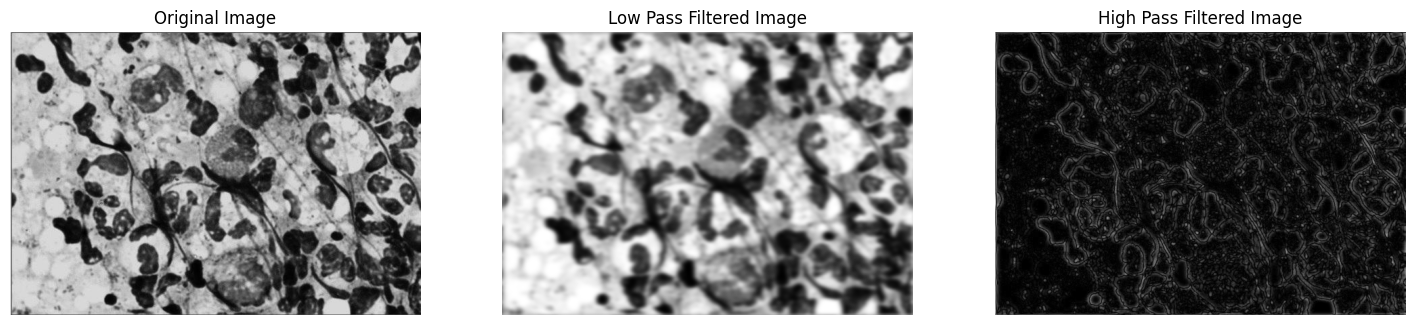

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Функции для фильтрации изображений
def gaussian_low_pass_filter(image, D0):
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2

    # Перевод изображения в частотную область
    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    # Создание маски Гауссовского фильтра
    mask = np.zeros((rows, cols, 2), np.float32)
    for i in range(rows):
        for j in range(cols):
            D = np.sqrt((i - crow)**2 + (j - ccol)**2)
            mask[i, j] = np.exp(-D**2 / (2 * D0**2))

    # Применение маски
    fshift = dft_shift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

    return img_back

def gaussian_high_pass_filter(image, D0):
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2

    # Перевод изображения в частотную область
    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    # Создание маски Гауссовского фильтра
    mask = np.ones((rows, cols, 2), np.float32)
    for i in range(rows):
        for j in range(cols):
            D = np.sqrt((i - crow)**2 + (j - ccol)**2)
            mask[i, j] = 1 - np.exp(-D**2 / (2 * D0**2))

    # Применение маски
    fshift = dft_shift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

    return img_back

# Загрузка изображения
def load_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Не удалось загрузить изображение по указанному пути: {image_path}")
    return image

# Отображение исходного и фильтрованных изображений
def show_images(original, low_pass, high_pass):
    plt.figure(figsize=(18, 6))
    titles = ['Original Image', 'Low Pass Filtered Image', 'High Pass Filtered Image']
    images = [original, low_pass, high_pass]

    for i in range(3):
        plt.subplot(1, 3, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Основной код
image_path = "/content/3.jpg"  # Укажите путь к вашему изображению
input_image = cv2.imread(image_path)
if input_image is None:
    raise FileNotFoundError(f"Не удалось загрузить изображение по указанному пути: {image_path}")

# Преобразование изображения в градации серого
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Применение фильтров
low_pass_result = gaussian_low_pass_filter(input_image, D0=30)
high_pass_result = gaussian_high_pass_filter(input_image, D0=30)

# Отображение результатов
show_images(input_image, low_pass_result, high_pass_result)


Медианный и адаптивный медианный фильры

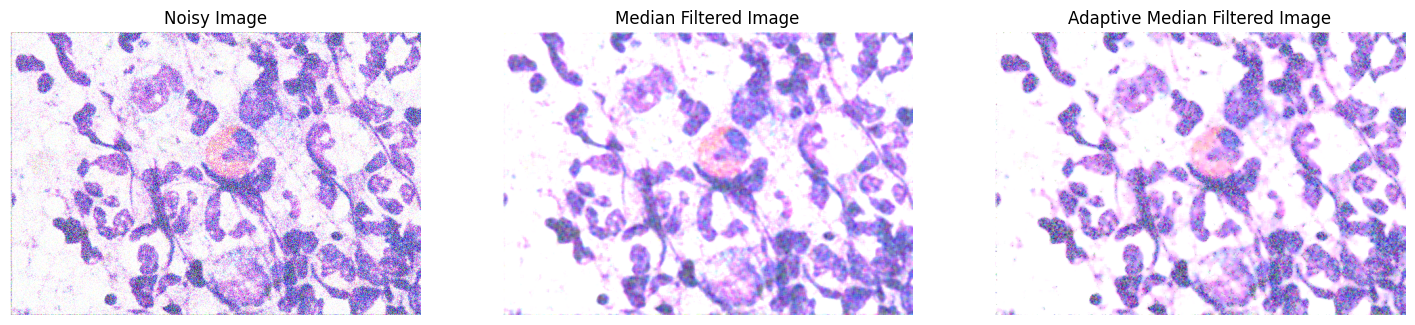

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Загрузка изображения
image_path = "/content/3.jpg"  # Укажите путь к вашему изображению
input_image = cv2.imread(image_path)
if input_image is None:
    raise FileNotFoundError(f"Не удалось загрузить изображение по указанному пути: {image_path}")

# Добавление шума к изображению
noise = np.random.randint(2, 200, input_image.shape, dtype='uint8')
noisy_image = cv2.add(input_image, noise)

# Функция для отображения изображения
def show_image(image, title):
    plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Функция для применения медианного фильтра
def median_filter(image, kernel_size=3):
    return cv2.medianBlur(image, kernel_size)

# Функция для применения адаптивного медианного фильтра
def adaptive_median_filter(image, max_kernel_size=7):
    filtered_image = image.copy()
    rows, cols, channels = image.shape
    for i in range(rows):
        for j in range(cols):
            k = 3
            while k <= max_kernel_size:
                half_k = k // 2
                # Определение границ окна
                rmin = max(0, i - half_k)
                rmax = min(rows, i + half_k + 1)
                cmin = max(0, j - half_k)
                cmax = min(cols, j + half_k + 1)
                # Извлечение окна
                window = image[rmin:rmax, cmin:cmax, :]
                # Применение медианного фильтра к окну
                z_min = np.min(window, axis=(0, 1))
                z_max = np.max(window, axis=(0, 1))
                z_med = np.median(window, axis=(0, 1))
                z_xy = image[i, j, :]
                if np.all(z_min < z_med) and np.all(z_med < z_max):
                    if np.all(z_min < z_xy) and np.all(z_xy < z_max):
                        filtered_image[i, j, :] = z_xy
                    else:
                        filtered_image[i, j, :] = z_med
                    break
                else:
                    k += 2
            if k > max_kernel_size:
                filtered_image[i, j] = z_med
    return filtered_image

# Применение фильтров
median_result = median_filter(noisy_image, kernel_size=5)
adaptive_median_result = adaptive_median_filter(noisy_image, max_kernel_size=7)

# Отображение исходного и фильтрованных изображений
plt.figure(figsize=(18, 6))
titles = ['Noisy Image', 'Median Filtered Image', 'Adaptive Median Filtered Image']
images = [noisy_image, median_result, adaptive_median_result]

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB) if len(images[i].shape) == 3 else images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()


Многоуровневая декомпозиция

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit

# Загрузка изображения
image_path = "/content/5.png"  # Укажите путь к вашему изображению
input_image = cv2.imread(image_path)
if input_image is None:
    raise FileNotFoundError(f"Не удалось загрузить изображение по указанному пути: {image_path}")

# Функция для отображения изображения
def show_image(image, title):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Функция для разложения изображения на базовый слой и детали
def multiscale_decomposition(image, kernel_size=15):
    base_layer = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
    detail_layer_1 = cv2.subtract(image, base_layer)
    detail_layer_2 = cv2.subtract(base_layer, cv2.GaussianBlur(base_layer, (kernel_size, kernel_size), 0))
    return base_layer, detail_layer_1, detail_layer_2

# Функция для применения сигмоиды к каждому пикселю
def sigmoid(x, a=1):
    return expit(a * x)

# Функция для применения тонового улучшения на основе трехуровневой декомпозиции
def multiscale_tone_enhancement(image, delta_0=1.0, delta_1=1.5, delta_2=1.2, alpha=1.0):
    # Разложение изображения на базовый слой и два слоя детализации
    base_layer, detail_layer_1, detail_layer_2 = multiscale_decomposition(image, kernel_size=15)

    # Среднее значение яркости для каждого канала
    mu = np.mean(base_layer, axis=(0, 1))

    # Применение S-симгмоиды для управления усилением деталей
    S = lambda x: sigmoid((x - mu) / 255.0, a=alpha)

    # Усиление базового слоя и слоев детализации
    enhanced_image = base_layer + delta_0 * (base_layer - mu) + \
                     3 * S(detail_layer_1) * (delta_1 * detail_layer_1) + \
                     3 * S(detail_layer_2) * (delta_2 * detail_layer_2)

    # Клиппинг результата в допустимый диапазон [0, 255]
    enhanced_image = np.clip(enhanced_image, 0, 255).astype(np.uint8)
    return enhanced_image

# Применение тонового улучшения
base_layer, detail_layer_1, detail_layer_2 = multiscale_decomposition(input_image, kernel_size=15)


# Отображение всех слоев
show_image(base_layer, 'Base Layer')
combined_detail_1 = cv2.add(input_image, detail_layer_1)
show_image(combined_detail_1, 'Detail Layer 1 Combined with Original')
combined_detail_2 = cv2.add(input_image, detail_layer_2)
show_image(combined_detail_2, 'Detail Layer 2 Combined with Original')

enhanced_image = multiscale_tone_enhancement(input_image)

# Отображение исходного и улучшенного изображения
show_image(input_image, 'Original Image')
show_image(enhanced_image, 'Enhanced Image')



Output hidden; open in https://colab.research.google.com to view.